# Feature selection - Feature importance from random forest

## Understand feature importance

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Store data in dataframe
dfX = pd.DataFrame(data=X, columns=dataObj.feature_names)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardization
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier

#Create objects 
forest = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

#Training
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

In [20]:
# Extract importance measure
importances = forest.feature_importances_

# Column names
cols = dfX.columns

# Sort array from based on importances from large to small
idxs = np.argsort(importances)[::-1]
importances = importances[idxs]
cols = cols[idxs]

# Print results
for count, (col, importance) in enumerate(zip(cols, importances)):
    print(f"{count+1:2d}) {col:30s} \t{importance:5.3f}")

 1) color_intensity                	0.197
 2) proline                        	0.159
 3) flavanoids                     	0.147
 4) od280/od315_of_diluted_wines   	0.136
 5) alcohol                        	0.105
 6) hue                            	0.069
 7) total_phenols                  	0.058
 8) alcalinity_of_ash              	0.030
 9) proanthocyanins                	0.024
10) malic_acid                     	0.024
11) magnesium                      	0.021
12) nonflavanoid_phenols           	0.017
13) ash                            	0.013


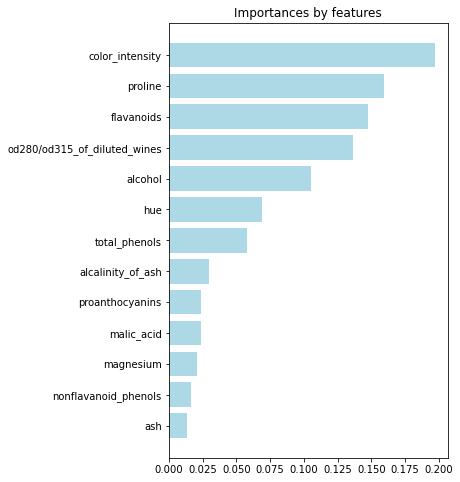

In [21]:
#Reverse the order for plotting
cols2 = cols[::-1]
importances2 = importances[::-1]

#Plotting
fig, ax = plt.subplots(figsize=(5,8))
ax.barh(cols2,importances2,  color='lightblue')
ax.set_title('Importances by features')
plt.show()

## SKL Implementation

In [22]:
from sklearn.feature_selection import SelectFromModel

#Create object
threshold = 0.1
#sel = SelectFromModel(forest, threshold=threshold)
sel = SelectFromModel(forest, max_features=5)


# Training (Actually, it does not matter whether we have X_train_std or X_train because random forrest does not care)
sel.fit(X_train_std, y_train)

# Columns chosen
sup = sel.get_support()

# Extract importances values
importances = sel.estimator_.feature_importances_

# Select only chosen columns
print('\nSupport array')
print('-'*30)
print(*sup, sep=', ')


Support array
------------------------------
True, False, False, False, False, False, True, False, False, True, False, True, True


In [23]:
# Sort array from based on importances from large to small
cols = dfX.columns
idxs = np.argsort(importances)[::-1]
sup = sup[idxs]
importances = importances[idxs]
cols = cols[idxs]

# Print results
for count, (col, importance) in enumerate(zip(cols, importances)):
    print(f"{count+1:2d}) {col:30s} \t{importance:5.3f}")

 1) color_intensity                	0.197
 2) proline                        	0.159
 3) flavanoids                     	0.147
 4) od280/od315_of_diluted_wines   	0.136
 5) alcohol                        	0.105
 6) hue                            	0.069
 7) total_phenols                  	0.058
 8) alcalinity_of_ash              	0.030
 9) proanthocyanins                	0.024
10) malic_acid                     	0.024
11) magnesium                      	0.021
12) nonflavanoid_phenols           	0.017
13) ash                            	0.013


In [24]:
# Print columns
cols_sel = cols[sup]
print('\nChosen columns')
print('-'*30)
print(*cols_sel, sep=', ')

cols_rem = cols[np.logical_not(sup)]
print(f'\nRemoved columns')
print('-'*30)
print(*cols_rem, sep=', ')


Chosen columns
------------------------------
color_intensity, proline, flavanoids, od280/od315_of_diluted_wines, alcohol

Removed columns
------------------------------
hue, total_phenols, alcalinity_of_ash, proanthocyanins, malic_acid, magnesium, nonflavanoid_phenols, ash


In [25]:
# Transformation (remove column)
X_sel = sel.transform(X)

# Show data
dfX_sel = pd.DataFrame(data=X_sel, columns=cols_sel)
display(dfX_sel)

,color_intensity,proline,flavanoids,od280/od315_of_diluted_wines,alcohol
0,14.23,3.06,5.64,3.92,1065.0
1,13.20,2.76,4.38,3.40,1050.0
2,13.16,3.24,5.68,3.17,1185.0
3,14.37,3.49,7.80,3.45,1480.0
4,13.24,2.69,4.32,2.93,735.0
...,...,...,...,...,...
173,13.71,0.61,7.70,1.74,740.0
174,13.40,0.75,7.30,1.56,750.0
175,13.27,0.69,10.20,1.56,835.0
176,13.17,0.68,9.30,1.62,840.0
